In [2]:
# Header for the notebook
from datetime import datetime
from IPython.display import display, Markdown

# Get the current date
title = "Circular Task analysis Assignment"
current_date = datetime.now().strftime("%d %B %Y, %H:%M:%S")
authors = "Antoine Lescarboura & Alexis Lagarde"

# Insert the date into the notebook
display(Markdown(f"# {title}"))
display(Markdown(f"{current_date}"))
display(Markdown(f"by {authors}"))

# Circular Task analysis Assignment

25 November 2025, 14:20:32

by Antoine Lescarboura & Alexis Lagarde

In [3]:
# imports (this is all you need for this assignment - please, do not import anything else)
import numpy as np
import matplotlib.pyplot as plt
import os

# very useful for zoomable plots in Jupyter notebooks
%matplotlib widget

# import pandas as pd # we do not use pandas here

In [4]:
file = './data/001MoDe_R1.csv'
file2 = './data/001MoDe_R1.marker.csv'

with open(file, 'r', encoding='utf-8') as f:
    firstLine = f.readline().strip()


if firstLine:
    data = firstLine.split(';')
    print("Header line information in 'data/001MoDe_R1.csv':")
    for d in data:
        print("  " + d.strip())


Header line information in 'data/001MoDe_R1.csv':
  screenWidth 1104
  screenHeight 661
  cornerX 302
  cornerY 80
  centerX 552
  centerY 330
  externalRadius 250
  internalRadius 170
  borderRadius 1
  cursorRadius 16
  indexOfDifficulty 28.00696429476858
  taskRadius 209.5
  taskTolerance 47
  borderColor java.awt.Color[r=255,g=255,b=255]
  backgroundColor java.awt.Color[r=0,g=0,b=0]
  cursorColorRecord java.awt.Color[r=255,g=0,b=0]
  cursorColorWait java.awt.Color[r=255,g=255,b=0]
  autoStart 3600
  cycleMaxNumber 6
  cycleDuration 20
  software LSL-mouse
  version 1.2.0rc5
  task CircularTarget
  isWithLSL false


In [16]:
SEPARATOR = ',' 

print("Markers in 'data/001MoDe_R1.marker.csv':")

lines_after_date = []       # Stocke les lignes d'un bloc à aligner
processing_block = False    # Indicateur si nous sommes dans un bloc

def check_date_format_manual(s):
    """
    Vérifie si le début de la chaîne correspond au format YYYY-MM-DD
    sans utiliser 're'.
    """
    if len(s) < 10:
        return False
    
    # Vérifie si les séparateurs sont des tirets
    if s[4] != '-' or s[7] != '-':
        return False
    
    # Vérifie si les segments sont des nombres (chiffres)
    try:
        # YYYY
        if not s[0:4].isdigit(): return False
        # MM
        if not s[5:7].isdigit(): return False
        # DD
        if not s[8:10].isdigit(): return False
        return True
    except IndexError:
        return False


def print_aligned_block(lines):
    """ Imprime un bloc de lignes en alignant les colonnes par virgule. """
    if not lines:
        return

    # Découpe chaque ligne en colonnes
    split_lines = [line.split(SEPARATOR) for line in lines]

    # Trouve la largeur max de chaque colonne
    max_widths = []
    num_cols = max(len(cols) for cols in split_lines) if split_lines else 0

    for col in range(num_cols):
        max_width = 0
        for cols in split_lines:
            if col < len(cols):
                # Utilise len() pour trouver la longueur du contenu (sans espaces blancs)
                max_width = max(max_width, len(cols[col].strip()))
        max_widths.append(max_width)

    # Recompose chaque ligne alignée
    for cols in split_lines:
        padded = []
        for i, col in enumerate(cols):
            # Obtient la valeur propre et l'aligne à gauche
            content = col.strip()
            # L'alignement est appliqué à la colonne en cours (max_widths[i])
            padded.append(content.ljust(max_widths[i]))
                 
        # Imprime les colonnes séparées par ' , '
        print("    " + " , ".join(padded))


# --- Traitement principal du fichier marker ---

try:
    # NOTE: Cette ligne suppose que 'file2' est défini dans le contexte d'exécution parent.
    with open(file2, 'r', encoding='utf-8') as f:
        # Sauter les 3 premières lignes (header)
        for i in range(3):
            next(f) 
        
        for line in f:
            stripped = line.strip()

            if check_date_format_manual(stripped):
                
                # 1. Imprimer l'ancien bloc avant de commencer le nouveau
                print_aligned_block(lines_after_date)
                lines_after_date = []
                processing_block = True

                # 2. Traitement et affichage de la nouvelle ligne de date
                # Enlève la date (YYYY-MM-DD) et la première virgule
                parts = stripped.split(SEPARATOR, 1)
                stripped_content = parts[1].strip() if len(parts) > 1 else stripped

                # Formate: Timestamp: Valeur
                subparts = stripped_content.split(SEPARATOR, 1)
                if len(subparts) == 2:
                    stripped_output = f"{subparts[0].strip()}: {subparts[1].strip()}"
                else:
                    stripped_output = stripped_content

                print(stripped_output)

            elif processing_block:
                # 3. Ajouter la ligne dans le bloc à aligner (si nous sommes dans un bloc)
                lines_after_date.append(stripped)
            
            else:
                # 4. Imprimer les lignes avant le premier bloc (si elles existent)
                print(" " + stripped)

except FileNotFoundError:
    print(f"Erreur: Le fichier '{file2}' est introuvable. Veuillez vérifier le chemin.")
except Exception as e:
    print(f"Une erreur est survenue lors du traitement du fichier: {e}")

# Imprimer le dernier bloc après la fin du fichier
print_aligned_block(lines_after_date)

Markers in 'data/001MoDe_R1.marker.csv':
1616776712325: KeyTyped=32 DoCycleChange
1616776712331: DoCycleChange:DoStartCycleTimedSequence
1616776712333: DoCycleChange:DoRecord RecordDone=0 PauseDone=0 ToDo=6
1616776732336: DoCycleChange:DoPause RecordDone=1 PauseDone=0 ToDo=6
1616776752340: DoCycleChange:DoRecord RecordDone=1 PauseDone=1 ToDo=6
1616776772351: DoCycleChange:DoPause RecordDone=2 PauseDone=1 ToDo=6
1616776792372: DoCycleChange:DoRecord RecordDone=2 PauseDone=2 ToDo=6
1616776812386: DoCycleChange:DoPause RecordDone=3 PauseDone=2 ToDo=6
1616776832390: DoCycleChange:DoRecord RecordDone=3 PauseDone=3 ToDo=6
1616776852404: DoCycleChange:DoPause RecordDone=4 PauseDone=3 ToDo=6
1616776872419: DoCycleChange:DoRecord RecordDone=4 PauseDone=4 ToDo=6
1616776892433: DoCycleChange:DoPause RecordDone=5 PauseDone=4 ToDo=6
1616776898364: KeyTyped=113 WINDOW_CLOSING
1616776898367: 
    Var    , nLaps  , Re     , Te    , error , MT/lap , IDe/lap , Be     , IPe   , 
    unit   , lap    , pix

In [7]:
def get_cell(file, cell_ref, sep=","):
    col_letters = "".join(filter(str.isalpha, cell_ref)).upper()
    row_number = int("".join(filter(str.isdigit, cell_ref)))

    row_index = row_number - 1

    col_index = 0
    for char in col_letters:
        col_index = col_index * 26 + (ord(char) - ord("A") + 1)
    col_index -= 1

    with open(file, "r", encoding="utf-8") as f:
        lines = f.readlines()

    line = lines[row_index].strip()

    cols = line.split(sep)

    return cols[col_index]

In [8]:
rt1_start = get_cell(file, "A5")
rt1_end = get_cell(file, "A3976")
rt2_start = get_cell(file, "A3978")
rt2_end = get_cell(file, "A7875")
rt3_start = get_cell(file, "A7877")
rt3_end = get_cell(file, "A11774")
rt4_start = get_cell(file, "A11776")
rt4_end = get_cell(file, "A15659")
rt5_start = get_cell(file, "A15661")
rt5_end = get_cell(file, "A19596")

time_diff_rt1 = (int(rt1_end) - int(rt1_start)) /1000
time_diff_rt2 = (int(rt2_end) - int(rt2_start)) /1000
time_diff_rt3 = (int(rt3_end) - int(rt3_start)) /1000
time_diff_rt4 = (int(rt4_end) - int(rt4_start)) /1000
time_diff_rt5 = (int(rt5_end) - int(rt5_start)) /1000


print("record times (milliseconds since the Unix epoch, 00:00:00 UTC on January 1, 1970):")
print(rt1_start, "to", rt1_end, "(",time_diff_rt1," s)")
print(rt2_start, "to", rt2_end, "(",time_diff_rt2," s)")
print(rt3_start, "to", rt3_end, "(",time_diff_rt3," s)")
print(rt4_start, "to", rt4_end, "(",time_diff_rt4," s)")   
print(rt5_start, "to", rt5_end, "(",time_diff_rt5," s)")


record times (milliseconds since the Unix epoch, 00:00:00 UTC on January 1, 1970):
1616776712329 to 1616776732333 ( 20.004  s)
1616776752758 to 1616776772347 ( 19.589  s)
1616776792700 to 1616776812379 ( 19.679  s)
1616776832937 to 1616776852398 ( 19.461  s)
1616776872475 to 1616776892427 ( 19.952  s)


In [9]:
first_dorecord_marker = 1616776712329

rt1_timestart = (int(rt1_start) - first_dorecord_marker) /1000
rt1_timeend = (int(rt1_end) - first_dorecord_marker) /1000
rt2_timestart = (int(rt2_start) - first_dorecord_marker) /1000
rt2_timeend = (int(rt2_end) - first_dorecord_marker) /1000
rt3_timestart = (int(rt3_start) - first_dorecord_marker) /1000
rt3_timeend = (int(rt3_end) - first_dorecord_marker) /1000
rt4_timestart = (int(rt4_start) - first_dorecord_marker) /1000
rt4_timeend = (int(rt4_end) - first_dorecord_marker) /1000
rt5_timestart = (int(rt5_start) - first_dorecord_marker) /1000
rt5_timeend = (int(rt5_end) - first_dorecord_marker) /1000

print("record times (seconds since the first DoRecord marker):")
print(rt1_timestart, "to", rt1_timeend, "(",time_diff_rt1," s)")
print(rt2_timestart, "to", rt2_timeend, "(",time_diff_rt2," s)")
print(rt3_timestart, "to", rt3_timeend, "(",time_diff_rt3," s)")
print(rt4_timestart, "to", rt4_timeend, "(",time_diff_rt4," s)")
print(rt5_timestart, "to", rt5_timeend, "(",time_diff_rt5," s)")

record times (seconds since the first DoRecord marker):
0.0 to 20.004 ( 20.004  s)
40.429 to 60.018 ( 19.589  s)
80.371 to 100.05 ( 19.679  s)
120.608 to 140.069 ( 19.461  s)
160.146 to 180.098 ( 19.952  s)


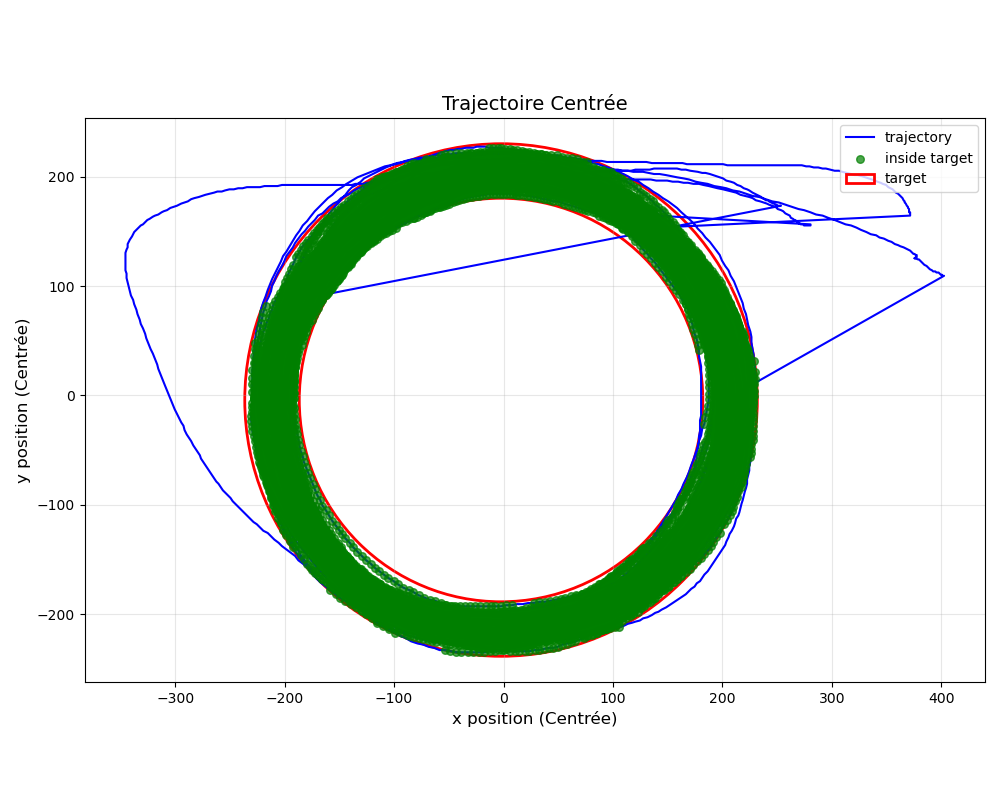

In [10]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Configuration du fichier
file = './data/001MoDe_R1.csv'
SEPARATOR = ','

try:
    # Charger les données de manière robuste :
    # skip_header=2 pour ignorer les 2 lignes de métadonnées
    # names=True pour utiliser la 3e ligne comme en-tête et accéder par nom
    data = np.genfromtxt(
        file, 
        delimiter=SEPARATOR, 
        skip_header=2,  
        names=True,     
        dtype=None, 
        encoding='utf-8'
    )
    
    # Extraire les colonnes par leur NOM (plus fiable)
    mouseX = data['mouseX']
    mouseY = data['mouseY']
    mouseInTarget = data['mouseInTarget']

except FileNotFoundError:
    print(f"Erreur: Le fichier '{file}' n'a pas été trouvé.")
    exit() # Arrête le script si le fichier n'est pas là
except ValueError as e:
    print(f"Erreur de chargement ou d'indexation (vérifiez les noms des colonnes) : {e}")
    print(f"Noms de colonnes trouvés par NumPy: {data.dtype.names if 'data' in locals() else 'N/A'}")
    exit() # Arrête le script en cas d'erreur critique


# --------------------------------------------------------------------------------
# 1. FILTRAGE
# --------------------------------------------------------------------------------

# Filtrer les points où mouseX = 0 ET mouseY = 0 (données invalides/manquantes)
valid_mask = ~((mouseX == 0) & (mouseY == 0))
mouseX = mouseX[valid_mask]
mouseY = mouseY[valid_mask]
mouseInTarget = mouseInTarget[valid_mask]

if len(mouseX) == 0:
    print("🚨 ERREUR : Il ne reste aucune donnée à tracer après le filtrage. Vérifiez le fichier ou le masque.")
    exit()

# --------------------------------------------------------------------------------
# 2. CENTRAGE (Partie ajoutée)
# --------------------------------------------------------------------------------

# Calculer la moyenne des coordonnées filtrées
mean_x = np.mean(mouseX)
mean_y = np.mean(mouseY)

# Centrer les données
mouseX = mouseX - mean_x
mouseY = mouseY - mean_y

# --------------------------------------------------------------------------------
# 3. TRACÉ
# --------------------------------------------------------------------------------

# Créer la figure
fig, ax = plt.subplots(figsize=(10, 8))

# Tracer la trajectoire complète
ax.plot(mouseX, mouseY, 'b-', linewidth=1.5, label='trajectory')

# Marquer les points à l'intérieur de la cible
inside_mask = mouseInTarget == 1
ax.scatter(mouseX[inside_mask], mouseY[inside_mask], 
            c='green', s=30, alpha=0.7, label='inside target', zorder=3)

# Dessiner la cible (cercle rouge)
# Le centre est maintenant très proche de (0, 0)
center_x = np.mean(mouseX[inside_mask])
center_y = np.mean(mouseY[inside_mask])

# Calculer le rayon approximatif
distances = np.sqrt((mouseX[inside_mask] - center_x)**2 + 
                    (mouseY[inside_mask] - center_y)**2)
outer_radius = np.max(distances)
inner_radius = np.min(distances)

# Dessiner les cercles de la cible
circle_outer = plt.Circle((center_x, center_y), outer_radius, 
                          color='red', fill=False, linewidth=2, label='target')
circle_inner = plt.Circle((center_x, center_y), inner_radius, 
                          color='red', fill=False, linewidth=2)
ax.add_patch(circle_outer)
ax.add_patch(circle_inner)

# Configuration du graphique
ax.set_xlabel('x position (Centrée)', fontsize=12)
ax.set_ylabel('y position (Centrée)', fontsize=12)
ax.set_title('Trajectoire Centrée', fontsize=14)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

In [11]:
# Charger les données depuis le fichier CSV
data = np.genfromtxt(file, delimiter=',', skip_header=3)

# Extraire les colonnes
timestamps = data[:, 0]
mouseX = data[:, 1]
mouseY = data[:, 2]
mouseInTarget = data[:, 3]

# Identifier les lignes avec des zéros (séparateurs de records)
zero_mask = (mouseX == 0) & (mouseY == 0)
zero_indices = np.where(zero_mask)[0]

# Séparer les données en records
records = []
start_idx = 0

for zero_idx in zero_indices:
    if zero_idx > start_idx:
        # Extraire le record actuel
        record_data = {
            'timestamps': timestamps[start_idx:zero_idx],
            'mouseX': mouseX[start_idx:zero_idx],
            'mouseY': mouseY[start_idx:zero_idx],
            'mouseInTarget': mouseInTarget[start_idx:zero_idx]
        }
        records.append(record_data)
    start_idx = zero_idx + 1

# Ajouter le dernier record (après le dernier zéro)
if start_idx < len(mouseX):
    record_data = {
        'timestamps': timestamps[start_idx:],
        'mouseX': mouseX[start_idx:],
        'mouseY': mouseY[start_idx:],
        'mouseInTarget': mouseInTarget[start_idx:]
    }
    records.append(record_data)

# Afficher les statistiques pour chaque record
print(f"Number of records: {len(records)}")
for i, record in enumerate(records):
    n_samples = len(record['timestamps'])
    t_start = record['timestamps'][0] / 1000  # Convertir en secondes
    t_end = record['timestamps'][-1] / 1000
    duration = t_end - t_start
    frequency = n_samples / duration if duration > 0 else 0
    
    print(f"record {i}: {n_samples} samples from {t_start:7.3f} to {t_end:7.3f} s, ({duration:.3f}s, {frequency:.3f} Hz)")

Number of records: 5
record 0: 3973 samples from     nan to 1616776732.333 s, (nans, 0.000 Hz)
record 1: 3898 samples from 1616776752.758 to 1616776772.347 s, (19.589s, 198.989 Hz)
record 2: 3898 samples from 1616776792.700 to 1616776812.379 s, (19.679s, 198.079 Hz)
record 3: 3884 samples from 1616776832.937 to 1616776852.398 s, (19.461s, 199.579 Hz)
record 4: 3936 samples from 1616776872.475 to 1616776892.427 s, (19.952s, 197.273 Hz)


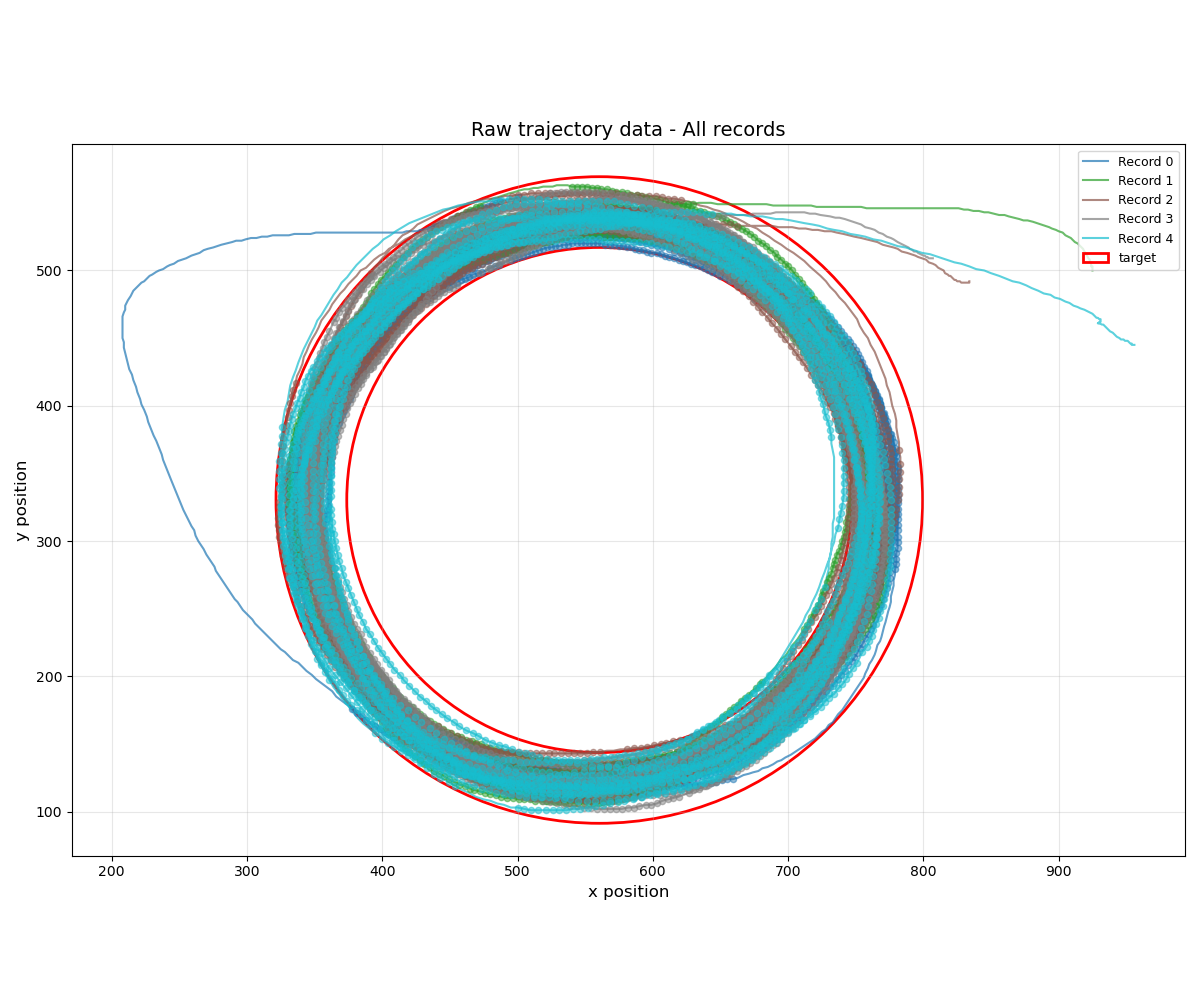

In [12]:
# Créer la figure avec tous les records
fig, ax = plt.subplots(figsize=(12, 10))

# Couleurs différentes pour chaque record
colors = plt.cm.tab10(np.linspace(0, 1, len(records)))

for i, record in enumerate(records):
    mx = record['mouseX']
    my = record['mouseY']
    mit = record['mouseInTarget']
    
    # Tracer la trajectoire de ce record
    ax.plot(mx, my, '-', linewidth=1.5, color=colors[i], 
            label=f'Record {i}', alpha=0.7)
    
    # Marquer les points à l'intérieur de la cible pour ce record
    inside_mask = mit == 1
    if np.any(inside_mask):
        ax.scatter(mx[inside_mask], my[inside_mask], 
                   c=[colors[i]], s=20, alpha=0.5, zorder=3)

# Dessiner la cible (en utilisant le premier record pour estimer)
first_record = records[0]
inside_mask = first_record['mouseInTarget'] == 1
if np.any(inside_mask):
    center_x = np.mean(first_record['mouseX'][inside_mask])
    center_y = np.mean(first_record['mouseY'][inside_mask])
    
    distances = np.sqrt((first_record['mouseX'][inside_mask] - center_x)**2 + 
                       (first_record['mouseY'][inside_mask] - center_y)**2)
    outer_radius = np.max(distances)
    inner_radius = np.min(distances)
    
    circle_outer = plt.Circle((center_x, center_y), outer_radius, 
                             color='red', fill=False, linewidth=2, label='target')
    circle_inner = plt.Circle((center_x, center_y), inner_radius, 
                             color='red', fill=False, linewidth=2)
    ax.add_patch(circle_outer)
    ax.add_patch(circle_inner)

# Configuration du graphique
ax.set_xlabel('x position', fontsize=12)
ax.set_ylabel('y position', fontsize=12)
ax.set_title('Raw trajectory data - All records', fontsize=14)
ax.legend(loc='upper right', fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

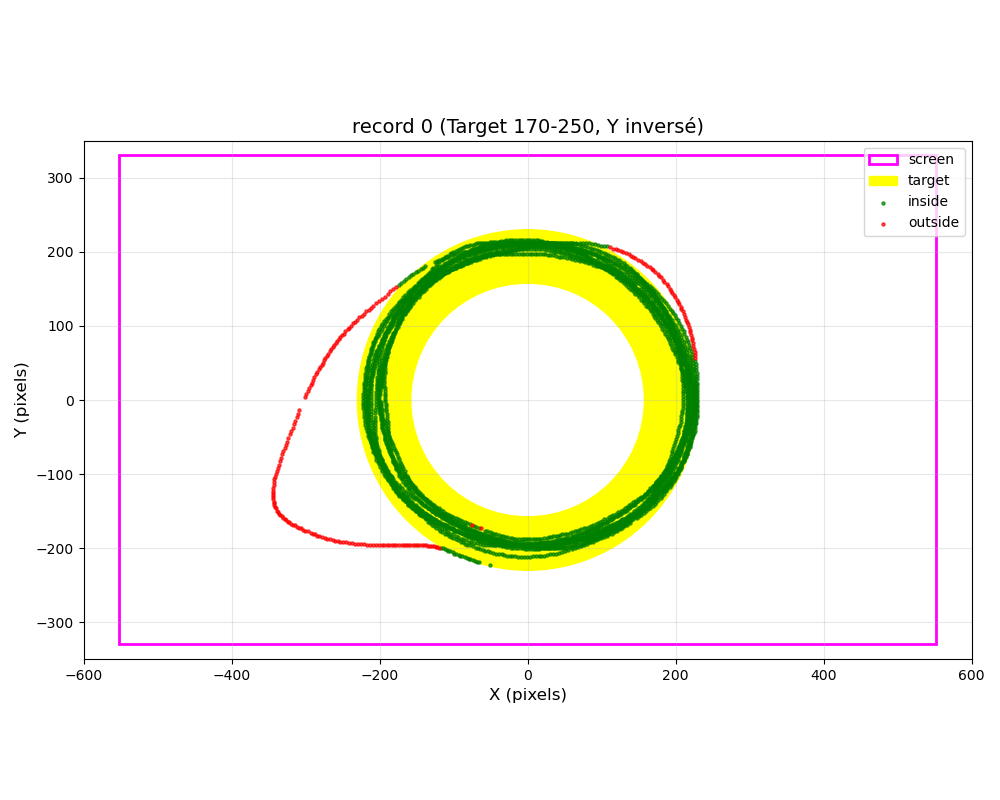

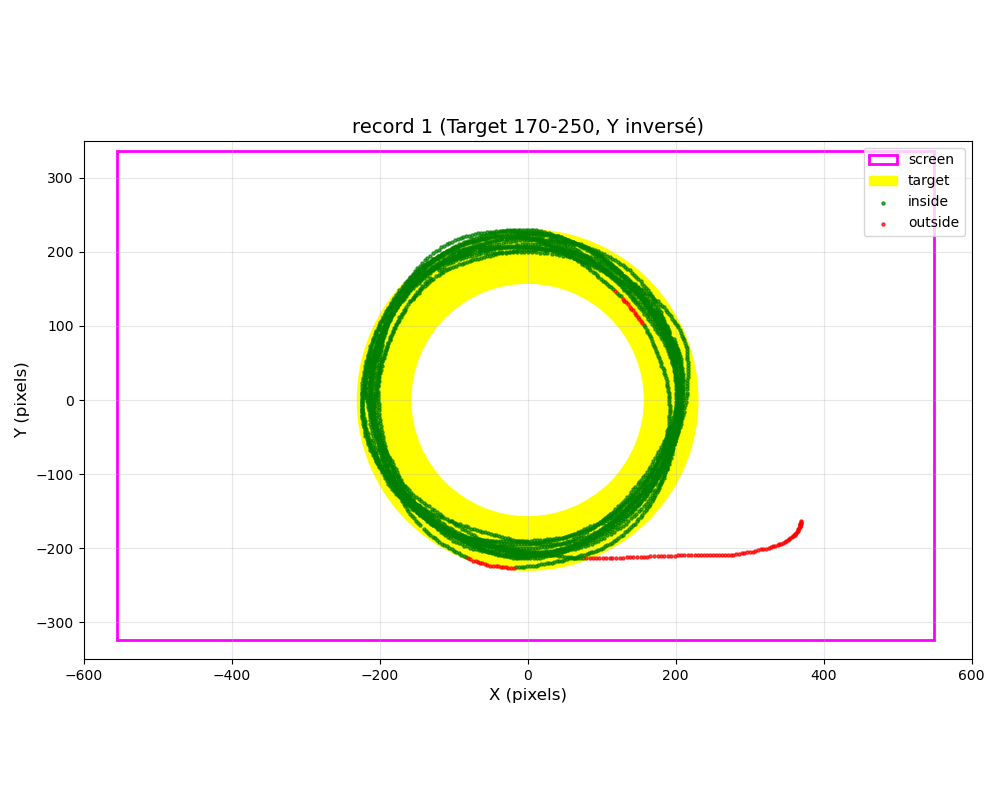

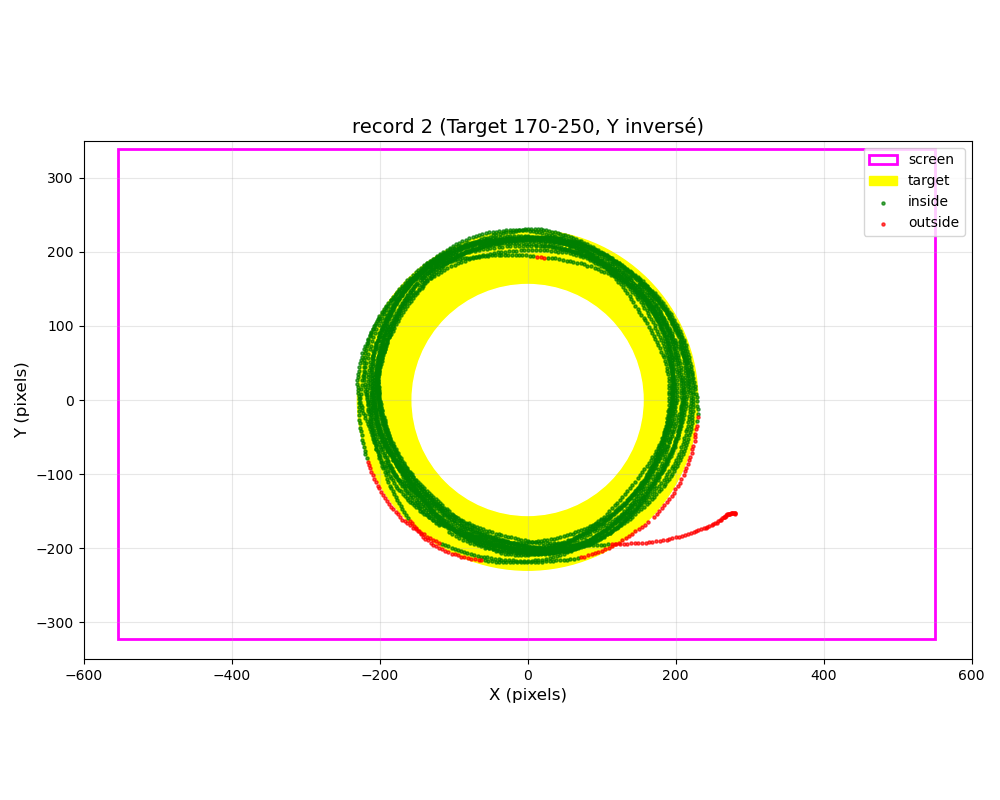

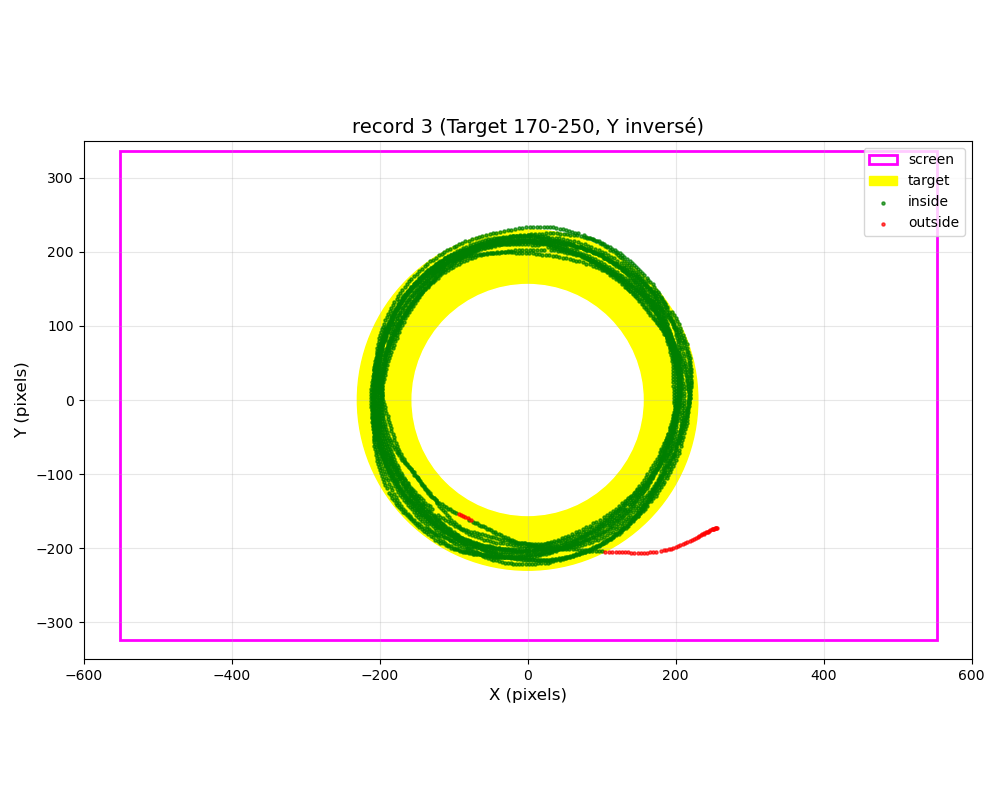

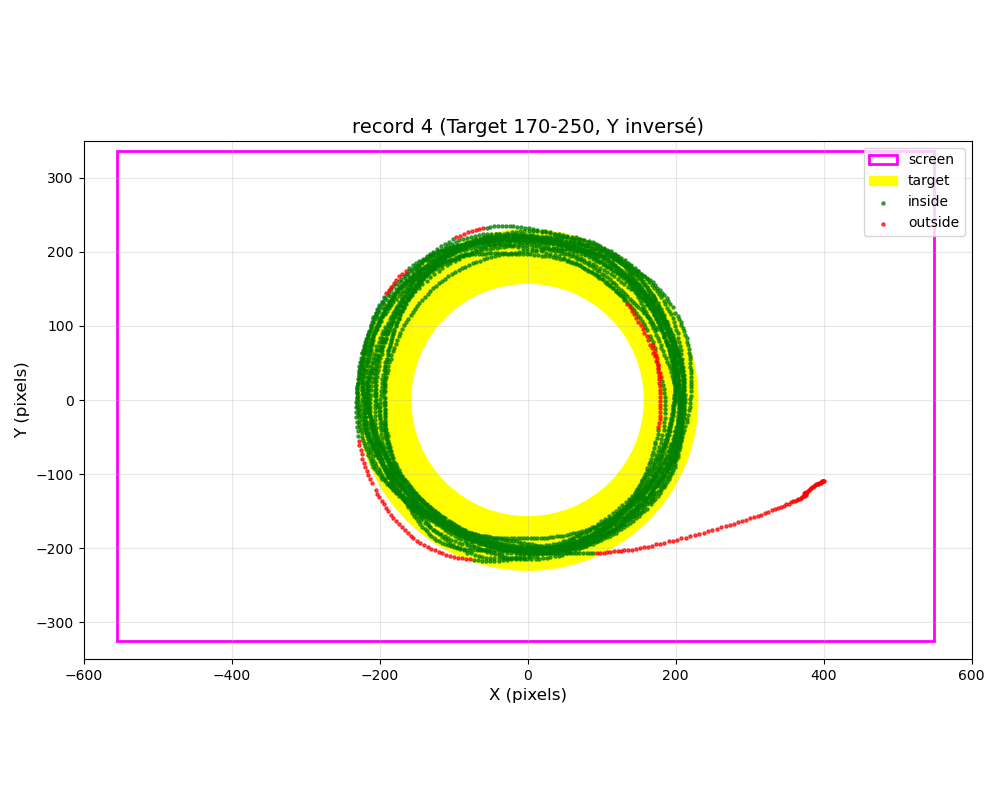

In [18]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Configuration du fichier
file = './data/001MoDe_R1.csv'
SEPARATOR = ';'

# =======================================================
# 1. CHARGEMENT ET PRÉ-TRAITEMENT DES DONNÉES
# =======================================================

# Initialiser les variables
screen_width = None
screen_height = None
data = None
first_line = ""

try:
    with open(file, 'r') as f:
        first_line = f.readline().strip()

    parts = first_line.split(';')
    
    for part in parts:
        tokens = part.strip().split()
        if len(tokens) >= 2:
            key = tokens[0]
            value = tokens[1]
            
            if key == 'screenWidth':
                screen_width = int(value)
            elif key == 'screenHeight':
                screen_height = int(value)
    
    data = np.genfromtxt(file, delimiter=SEPARATOR, skip_header=3, invalid_raise=False)
    
    if data.ndim == 1:
        data = np.genfromtxt(file, delimiter=',', skip_header=3, invalid_raise=False)
    
except Exception as e:
    pass

if screen_width is None or screen_height is None or data is None or data.ndim != 2:
    print("Erreur: Chargement des données échoué.")

timestamps = data[:, 0]
mouseX = data[:, 1]
mouseY = data[:, 2]
mouseInTarget = data[:, 3]

zero_mask = (mouseX == 0) & (mouseY == 0)
zero_indices = np.where(zero_mask)[0]

records = []
start_idx = 0

for zero_idx in zero_indices:
    if zero_idx > start_idx:
        record_data = {
            'timestamps': timestamps[start_idx:zero_idx],
            'mouseX': mouseX[start_idx:zero_idx],
            'mouseY': mouseY[start_idx:zero_idx],
            'mouseInTarget': mouseInTarget[start_idx:zero_idx]
        }
        records.append(record_data)
    start_idx = zero_idx + 1

if start_idx < len(mouseX):
    record_data = {
        'timestamps': timestamps[start_idx:],
        'mouseX': mouseX[start_idx:],
        'mouseY': mouseY[start_idx:],
        'mouseInTarget': mouseInTarget[start_idx:]
    }
    records.append(record_data)

# =======================================================
## ⭐️ 2. DÉFINITION STATIQUE DES RAYONS GLOBAUX DE LA CIBLE
# =======================================================

# Rayons fixes spécifiés
GLOBAL_OUTER_RADIUS = 230
GLOBAL_INNER_RADIUS = 156

# =======================================================
## 3. TRACÉ POUR CHAQUE RECORD (avec l'axe Y inversé)
# =======================================================

for i, record in enumerate(records):
    if len(record['mouseX']) < 2:
        continue

    current_mouseX_raw = record['mouseX']
    current_mouseY_raw = record['mouseY']
    current_mouseInTarget = record['mouseInTarget']

    if np.all(np.isnan(current_mouseX_raw)) or np.all(np.isnan(current_mouseY_raw)):
        continue

    # Centrage (reste nécessaire pour le tracé des points)
    mean_x_record = np.nanmean(current_mouseX_raw)
    mean_y_record = np.nanmean(current_mouseY_raw)
    
    if np.isnan(mean_x_record) or np.isnan(mean_y_record):
        continue
    
    current_mouseX_centered = current_mouseX_raw - mean_x_record
    
    # ⭐ CLÉ : Inversion de l'axe Y (Y_centered = -(Y_raw - Y_mean))
    current_mouseY_centered = -(current_mouseY_raw - mean_y_record)

    screen_x_min = 0 - mean_x_record
    
    # ⭐ CLÉ : Calcul de la nouvelle coordonnée Y de départ de la boîte écran
    # L'ancienne limite Y max (screen_height - mean_y_record) devient la nouvelle limite Y min après inversion
    screen_y_start = -(screen_height - mean_y_record) 
    
    fig, ax = plt.subplots(figsize=(10, 8))

    # Dessiner le cadre de l'écran (magenta) - Zorder=0
    # La boîte commence à screen_y_start et monte de screen_height
    screen_rect = plt.Rectangle((screen_x_min, screen_y_start), screen_width, screen_height, 
                                color='magenta', fill=False, linewidth=2, label='screen', zorder=0)
    ax.add_patch(screen_rect)

    inside_target_mask = current_mouseInTarget == 1
    outside_target_mask = current_mouseInTarget == 0

    valid_inside_mask = inside_target_mask & ~np.isnan(current_mouseX_centered) & ~np.isnan(current_mouseY_centered)
    valid_outside_mask = outside_target_mask & ~np.isnan(current_mouseX_centered) & ~np.isnan(current_mouseY_centered)
    
    # --- DESSIN DE LA CIBLE JAUNE (Anneau STATIQUE) ---
    target_center_x, target_center_y = 0, 0 
    
    # 1. Dessiner le grand cercle rempli (Jaune)
    if GLOBAL_OUTER_RADIUS > 0 and GLOBAL_INNER_RADIUS < GLOBAL_OUTER_RADIUS:
        # CERCLE EXTÉRIEUR JAUNE REMPLI: zorder=1 (en dessous des points)
        target_circle_outer = plt.Circle((target_center_x, target_center_y), GLOBAL_OUTER_RADIUS, 
                                    color='yellow', fill=True, label='target', alpha=1.0, zorder=1) 
        ax.add_patch(target_circle_outer)
        
        # 2. Dessiner un deuxième cercle (Trou) rempli de la couleur de fond (Blanc)
        if GLOBAL_INNER_RADIUS > 0:
            # CERCLE INTÉRIEUR BLANC: Zorder légèrement supérieur au jaune pour simuler un trou.
            target_circle_inner = plt.Circle((target_center_x, target_center_y), GLOBAL_INNER_RADIUS, 
                                        color='white', fill=True, alpha=1.0, zorder=1.5) 
            ax.add_patch(target_circle_inner)

    # Tracer les points 'inside' (vert) et 'outside' (rouge)
    if np.sum(valid_inside_mask) > 0:
        ax.scatter(current_mouseX_centered[valid_inside_mask], current_mouseY_centered[valid_inside_mask], 
                    c='green', s=5, alpha=0.7, label='inside', zorder=2) # Zorder 2 pour être au-dessus des cercles
    if np.sum(valid_outside_mask) > 0:
        ax.scatter(current_mouseX_centered[valid_outside_mask], current_mouseY_centered[valid_outside_mask], 
                    c='red', s=5, alpha=0.7, label='outside', zorder=3) 

    # Configuration du graphique
    ax.set_xlabel('X (pixels)', fontsize=12)
    ax.set_ylabel('Y (pixels)', fontsize=12)
    ax.set_title(f'record {i} (Target 170-250, Y inversé)', fontsize=14)
    
    ax.legend(loc='upper right', fontsize=10)

    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal', adjustable='box')
    
    ax.set_xlim(-600, 600)
    ax.set_ylim(-350, 350) 

    plt.tight_layout()
    plt.show() 
    plt.close(fig)